## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('data/human_body_temperature.csv')

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import scipy.stats as stats

# 1 - Is the distribution of body temperatures normal?

Based on the fact that the sample size is over 30(130 in our dataset) and the shape of histogram is like a bell, I think the body temperatures are normally distributed. 

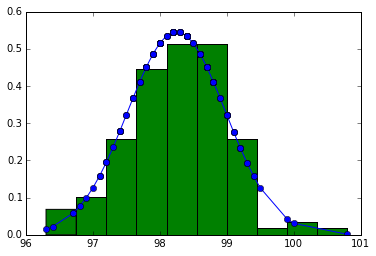

In [26]:
# Problem 1:
# Is the distribution of body temperatures normal?

%matplotlib inline
t = sort(df.temperature)
fit = stats.norm.pdf(t, np.mean(t), np.std(t))  #this is a fitting indeed
plt.plot(t,fit,'-o')
plt.hist(t,normed=True)      #use this to draw histogram
plt.show() 

# 2 - Is the true population mean really 98.6 degrees F?

Null hypothesis is the population mean for temperature is 98.6 degrees F

Alternative hypothesis is the population mean is not equal to 98.6 degree F

Based on the calculation in the cell below, z score is  5.476 and two sided p-value is 0.000000044.   

Since p value is smaller than the significant level of 0.025, so I will reject the null hypothesis that population mean of the temperature is 98.6 degrees F

# is it approriate to apply a z-test or a t-test? How will the result be different?

Since we have a relatively large sample size, we can use z-test.  t-test will produce simiar result as z-test because degree of freedom is relatively higher in this case with 129.  


In [39]:
# Problem 2
# 2 - Is the true population mean really 98.6 degrees F?
t = sort(df.temperature)
z = (98.6 - np.mean(t)) / (np.std(t) / sqrt(len(df)))
print "z score is %6.3F and pvalue is %10.9F" % (z, stats.norm.sf(z)*2)
print "t score is %6.3F and pvalue is %10.9F" % (z, stats.t.sf(z, len(df)-1)*2)


z score is  5.476 and pvalue is 0.000000044
t score is  5.476 and pvalue is 0.000000219


# At what temperature should we consider someone's temperature to be "abnormal"?

Based the calculation of the margin of error and confidence interval in the cell below, temperature become abnormal when it is lower than 96.82 F or higher than 99.68 F.



In [41]:
# Problem 3:
#At what temperature should we consider someone's temperature to be "abnormal"?
# Start by computing the margin of error and confidence interval.

#assuming using 95% confidence level
marginoferror = stats.norm.ppf(0.975) * np.std(t)
print "Confidence Interval is with 95% confidence level:", np.mean(t) - marginoferror, np.mean(t) + marginoferror


Confidence Interval is with 95% confidence level: 96.8177558267 99.6807057117


# Is there a significant difference between males and females in normal temperature?

Based on the two sample test in the cell below, the males and females temperature are sigificantly difference.  P value for the two side t test statistics is 0.0001 which is smaller than the sigificant level 0.05.  So, I am rejecting the null hypothesis that the average males temperature is the same as females temperature.  


In [42]:
# Problem 4:
# Null hypothesis is that the difference between mean for male and female is zero.
# Alternative hypothesis is that the difference between mean for male and female is not zero. 

#standard error for two sample testing
standerror = sqrt(df.groupby('gender').std()['temperature']['F']**2/df[df['gender'] == 'F'].size + \
df.groupby('gender').std()['temperature']['M']**2/df[df['gender'] == 'M'].size)

#degree of freedom is 
dfreedom = min(df[df['gender'] == 'F'].size - 1,df[df['gender'] == 'M'].size - 1) 

# T score
tscore =  (abs(df.groupby('gender').mean()['temperature']['F'] - df.groupby('gender').mean()['temperature']['M']) - 0) / standerror
pval = stats.t.sf(np.abs(tscore), dfreedom)*2
print 't-statistic = %6.3f p-value = %6.4f' % (tscore, pval)


t-statistic =  3.958 p-value = 0.0001
